<a href="https://colab.research.google.com/github/LukaT11/quantitative_finance/blob/master/Instability_of_Parameter_Estimates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Instability of Parameter Estimates**

## **Parameters**
A parameter is anything that a model uses to constrain its predictions. Commonly, a parameter is a quantity that helps to describe a data set or a distribution. For example, the mean of a normal distribution is a parameter; in fact, we say that a normal distribution is parametrized by its mean and variance. If we take the mean of a set of samples drawn from the normal distribution, we get an estimate of the mean of the distribution. Similarly, the mean of a set of observations is an estimate of the parameter of the underlying distribution (which is often assumed to be normal). Other parameters include the median, the correlation coefficient to another series, the standard deviation, and every other measurement of a data set.

## **You Never Know, You Only Estimate**
When you take the mean of a data set, you do not know the mean. You have estimated the mean as best you can from the data you have. The estimate can be off. This is true of any parameter you estimate. To actually understand what is going on you need to determine how good your estimate is by looking at its stability/standard error/confidence intervals.

## **Instability of estimates**
Whenever we consider a set of observations, our calculation of a parameter can only be an estimate. It will change as we take more measurements or as time passes and we get new observations. We can quantify the uncertainty in our estimate by looking at how the parameter changes as we look at different subsets of the data. For instance, standard deviation describes how different the mean of a set is from the mean of each observation, that is, from each observation itself. In financial applications, data often comes in time series. In this case, we can estimate a parameter at different points in time; say, for the previous 30 days. By looking at how much this moving estimate fluctuates as we change our time window, we can compute the instability of the estimated parameter.

In [0]:
# We'll be doing some examples, so let's import the libraries we'll need
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **Example: mean and standard deviation**
First, let's take a look at some samples from a normal distribution. We know that the mean of the distribution is 0 and the standard deviation is 1; but if we measure the parameters from our observations, we will get only approximately 0 and approximately 1. We can see how these estimates change as we take more and more samples:

-0.26951611032632805
0.027109073490359778
-0.020616059111720507
-0.038643973513210604


Text(0, 0.5, 'Frequency')

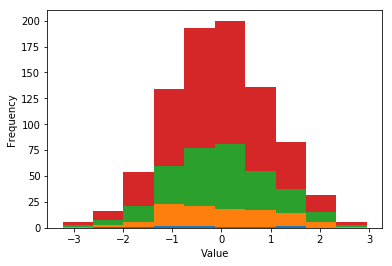

In [2]:
np.random.seed(123)
normal = np.random.randn(500)

print(np.mean(normal[:10]))
print(np.mean(normal[:100]))
print(np.mean(normal[:250]))
print(np.mean(normal))

plt.hist([normal[:10], normal[:100], normal[:250], normal], stacked=True)
plt.xlabel('Value')
plt.ylabel('Frequency')

In [3]:
print(np.std(normal[:10]))
print(np.std(normal[:100]))
print(np.std(normal[:250]))
print(np.std(normal))

1.236304801499023
1.128240470477961
1.0174604368340197
1.0032028561568238


Notice that, although the probability of getting closer to 0 and 1 for the mean and standard deviation, respectively, increases with the number of samples, we do not always get better estimates by taking more data points. Whatever our expectation is, we can always get a different result, and our goal is often to compute the probability that the result is significantly different than expected.

With time series data, we usually care only about contiguous subsets of the data. The moving average (also called running or rolling) assigns the mean of the previous  n  data points to each point in time. Below, we compute the 90-day moving average of a stock price and plot it to see how it changes. There is no result in the beginning because we first have to accumulate at least 90 days of data.

## **Example: Non-Normal Underlying Distribution**
What happens if the underlying data isn't normal? A mean will be very deceptive. Because of this it's important to test for normality of your data. We'll use a Jarque-Bera test as an example.

Mean: 0.0048377625019577165
Standard Devaiation: 5.100359151644984


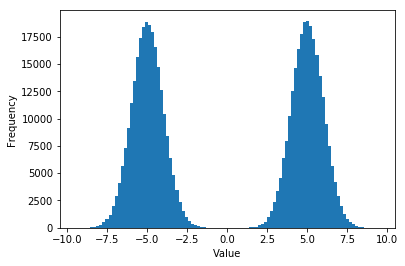

In [4]:
#Generate some data from a bi-modal distribution

def bimodal(n):
  x = np.zeros(n)
  
  for i in range(n):
    if np.random.binomial(1, 0.5) == 0:
      x[i] = np.random.normal(-5, 1)
    else:
      x[i] = np.random.normal(5, 1)
      
  return x

x = bimodal(500000)

plt.hist(x, bins = 100)
plt.ylabel('Frequency')
plt.xlabel('Value')

print(f'Mean: {np.mean(x)}')
print(f'Standard Devaiation: {np.std(x)}')

Sure enough, the mean is increidbly non-informative about what is going on in the data. We have collapsed all of our data into a single estimate, and lost of a lot of information doing so. This is what the distribution should look like if our hypothesis that it is normally distributed is correct.

Text(0.5, 0, 'Value')

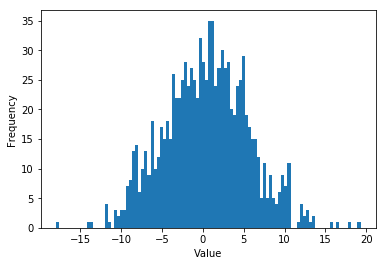

In [5]:
mu = np.mean(x)
sigma = np.std(x)

N = np.random.normal(mu,sigma, 1000)

plt.hist(N , bins = 100)
plt.ylabel('Frequency')
plt.xlabel('Value')